In [3]:
import torch 
import torch.nn as nn 
import torchvision.transforms as transforms 
import torchvision.datasets as dsets 
import numpy as np

In [1]:
IMAGE_SIZE = 16 

In [5]:
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()]) 
train_dataset = dsets.MNIST(root='./data', train=True, transform=composed, download=True) 
test_dataset = dsets.MNIST(root='./data', train=False, transform=composed, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:07<00:00, 1339837.42it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 121860.64it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 790385.87it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4556452.71it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
           0.0196, 0.0824, 0.1059, 0.0980, 0.1843, 0.0902, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0824, 0.2157, 0.3765, 0.5333,
           0.6118, 0.7373, 0.6627, 0.6196, 0.7647, 0.3020, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0118, 0.3804, 0.8549, 0.9294, 0.9569,
           0.8784, 0.9294, 0.4588, 0.2510, 0.2000, 0.0510, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.1569, 0.4588, 0.7765, 0.7608,
           0.2353, 0.3137, 0.1412, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.4275, 0.6941,
           0.1137, 

In [18]:
print(type(train_dataset))  
image, label = train_dataset[0]  
image 

<class 'torchvision.datasets.mnist.MNIST'>


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0196, 0.0824, 0.1059, 0.0980, 0.1843, 0.0902, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0824, 0.2157, 0.3765, 0.5333,
          0.6118, 0.7373, 0.6627, 0.6196, 0.7647, 0.3020, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0118, 0.3804, 0.8549, 0.9294, 0.9569,
          0.8784, 0.9294, 0.4588, 0.2510, 0.2000, 0.0510, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.1569, 0.4588, 0.7765, 0.7608,
          0.2353, 0.3137, 0.1412, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.4275, 0.6941,
          0.1137, 0.0000, 0.0000

In [16]:
import matplotlib.pyplot as plt 
def show_data(data): 
    image, label = data 
    image = image.numpy().reshape((IMAGE_SIZE, IMAGE_SIZE)) 
    plt.imshow(image, cmap='gray')
    plt.title(label)

torch.Size([1, 16, 16])


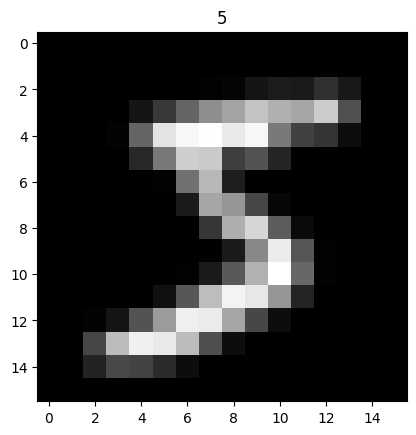

In [24]:
print(train_dataset[0][0].size())
show_data(train_dataset[0])

In [25]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    # Outputs in each steps
    def activations(self, x):
        #outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

In [26]:
model = CNN(out_1=16, out_2=32) 
criterion = nn.CrossEntropyLoss() 
learning_rate = 0.1 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100) 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=5000)

In [28]:
# Train the model

n_epochs=3
cost_list=[]
accuracy_list=[]
N_test=len(test_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in test_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
# train_model(n_epochs)